In [1]:
import os
import re
import uproot
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3)

In [2]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Time/old_tools/11_tpdfhist.root")
fname  = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Time/tres_trueq_2Dhistogram.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

print(f.classnames())
print(of.classnames())

{'htimepdf_100.509697;1': 'TH2D', 'htimepdf_200.510345;1': 'TH2D', 'htimepdf_300.510559;1': 'TH2D', 'htimepdf_400.510681;1': 'TH2D', 'htimepdf_500.510742;1': 'TH2D', 'htimepdf_600.510803;1': 'TH2D', 'htimepdf_700.510803;1': 'TH2D', 'htimepdf_800.510864;1': 'TH2D', 'htimepdf_900.510864;1': 'TH2D', 'htimepdf_1000.510864;1': 'TH2D', 'Total;1': 'TGraph', 'PC;1': 'TGraph'}
{'hist_tpdf;1': 'TH3D'}


In [11]:
# read 2D histogram
p = 700.510803
H ,  tresbins, trueqbins           =  f[f"htimepdf_{p}"].to_numpy()
oH, otresbins, otrueqbins, mombins = of["hist_tpdf"].to_numpy()

assert (tresbins  == otresbins).all()
assert (trueqbins == otrueqbins).all()

pidx = np.digitize(p, mombins) - 1

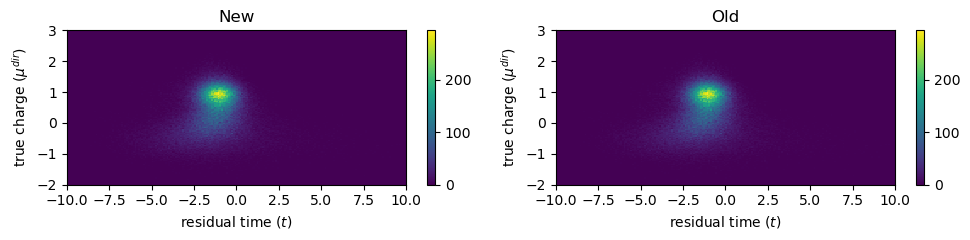

In [12]:
plt.figure(figsize=[10, 2.5])

# new
plt.subplot(121)
plt.title("New")
plt.pcolormesh(tresbins, trueqbins, H.T)
plt.xlabel(r"residual time ($t$)")
plt.ylabel(r"true charge ($\mu^{dir}$)")
plt.colorbar()

# old
plt.subplot(122)
plt.title("Old")
plt.pcolormesh(otresbins, otrueqbins, oH[:, :, pidx].T)
plt.xlabel(r"residual time ($t$)")
plt.ylabel(r"true charge ($\mu^{dir}$)")
plt.colorbar()

plt.tight_layout()

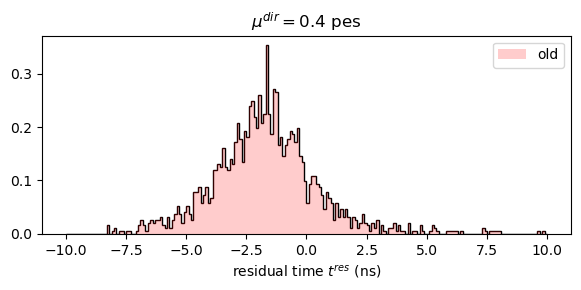

In [13]:
# proyection tres
mu = 0.4
true_q = np.log10(mu)
i = np.digitize(true_q, trueqbins) - 1

plt.figure(figsize=[6, 3])

plt.title(r"$\mu^{dir}" + f"= {mu}$ pes")

proj = H[:, i]
norm = np.sum(proj * (tresbins[1:] - tresbins[:-1]))
plt.stairs(proj/norm, tresbins, color="k")

proj = oH[:, i, pidx]
norm = np.sum(proj * (tresbins[1:] - tresbins[:-1]))
plt.stairs(proj/norm, otresbins, alpha=0.2, fill=True, label='old', color="r")

plt.xlabel(r"residual time $t^{res}$ (ns)")
plt.legend()
plt.tight_layout()

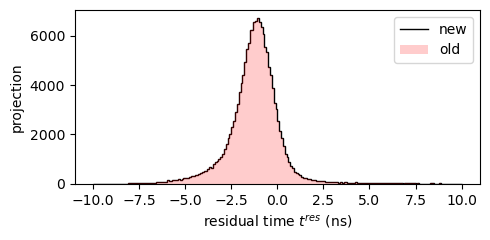

In [14]:
# proyection tres
plt.figure(figsize=[5, 2.5])

plt.stairs(H.sum(axis=1), tresbins, label='new', color="k")
plt.stairs(oH[:, :, pidx].sum(axis=1), otresbins, alpha=0.2, fill=True, label='old', color="r")

plt.xlabel(r"residual time $t^{res}$ (ns)")
plt.ylabel(r"projection")
plt.legend()
plt.tight_layout()

Total [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
PC [429. 568. 677. 716. 778. 783. 818. 829. 853. 843.]


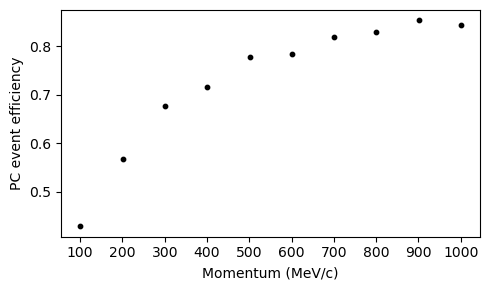

In [10]:
momenta, ntotal = f["Total"].values()
momenta, npc    = f["PC"]   .values()

print("Total", ntotal)
print("PC", npc)

plt.figure()

plt.scatter(momenta, npc/ntotal, s=10, color="k")

plt.xlabel("Momentum (MeV/c)")
plt.ylabel("PC event efficiency")

plt.xticks(np.round(momenta)-1)

plt.tight_layout()

In [ ]:
import ROOT
rootf = ROOT.TFile(fname)
th2d = rootf.Get(f"htimepdf_{p}")

xi, yi = np.random.randint(H.shape[0]), np.random.randint(H.shape[1])

x = th2d.GetXaxis().GetBinLowEdge(xi + 1)
y = th2d.GetYaxis().GetBinLowEdge(yi + 1)

print("  ROOT:", x, y, th2d.GetBinContent(xi+1, yi+1))
print("uproot:", tresbins[xi], trueqbins[yi], H[xi, yi])